In [103]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [104]:
df1=pd.read_csv("/kaggle/input/titanic/train.csv")
df2=pd.read_csv("/kaggle/input/titanic/test.csv")

In [105]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [106]:
df1["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [107]:
df1["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

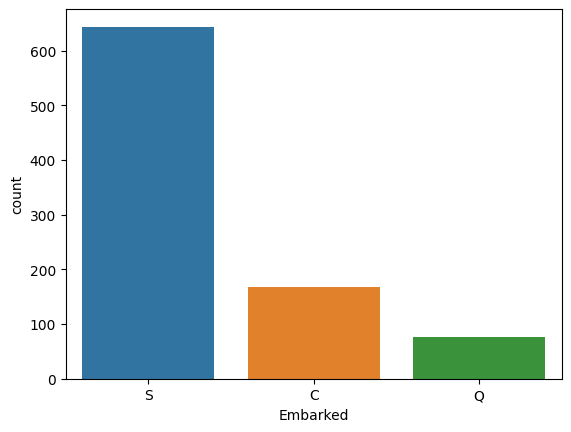

In [108]:
sns.countplot(x="Embarked",data=df1)
plt.show()

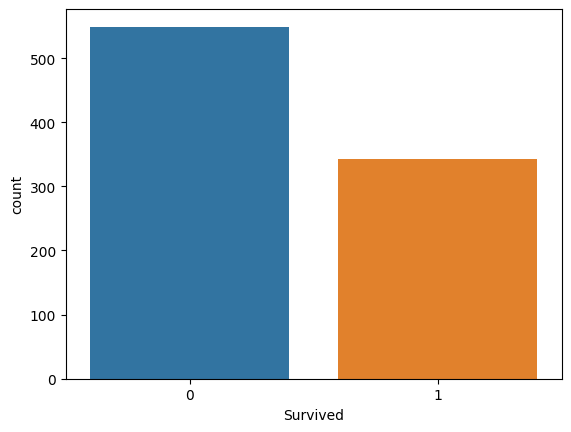

In [109]:
sns.countplot(x="Survived",data=df1)
plt.show()

In [110]:
df1["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

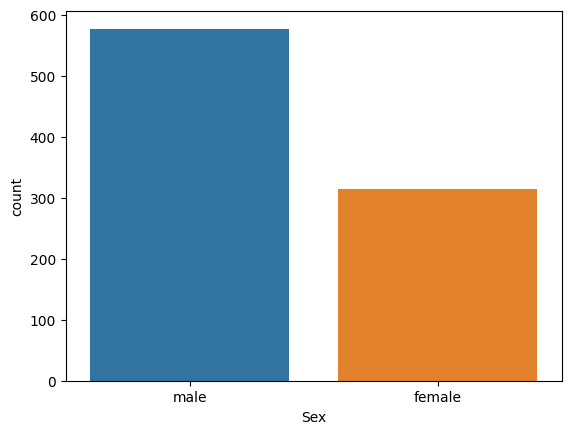

In [111]:
sns.countplot(x="Sex",data=df1)
plt.show()

In [112]:
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [113]:
test_passenger_id=df2.PassengerId

In [114]:
df1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [115]:
df1["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [116]:
df1["Embarked"]=df1["Embarked"].replace({"S":0,"C":1,"Q":3})
df2["Embarked"]=df2["Embarked"].replace({"S":0,"C":1,"Q":3})

/tmp/ipykernel_35/1420386019.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1["Embarked"]=df1["Embarked"].replace({"S":0,"C":1,"Q":3})
/tmp/ipykernel_35/1420386019.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2["Embarked"]=df2["Embarked"].replace({"S":0,"C":1,"Q":3})


In [117]:
mean_age = df1['Age'].mean()
df1['Age'].fillna(mean_age, inplace=True)
mean_em = df1['Embarked'].mean()
df1['Embarked'].fillna(mean_em, inplace=True)
mean_age = df2['Age'].mean()
df2['Age'].fillna(mean_age, inplace=True)
mean_fare = df2['Fare'].mean()
df2['Fare'].fillna(mean_fare, inplace=True)

/tmp/ipykernel_35/4086105067.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['Age'].fillna(mean_age, inplace=True)
/tmp/ipykernel_35/4086105067.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.m

In [118]:
df1.drop(columns=["PassengerId","Name","Ticket","Cabin"],axis=1,inplace=True)
df2.drop(columns=["PassengerId","Name","Ticket","Cabin"],axis=1,inplace=True)

In [119]:
df2.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [120]:
df1.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# Survive

In [121]:
women = df1.loc[df1.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("women who survived:", rate_women)

women who survived: 0.7420382165605095


In [122]:
men = df1.loc[df1.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("men who survived:", rate_men)

men who survived: 0.18890814558058924


In [123]:
df1["Sex"]=df1["Sex"].replace({"male":1,"female":0})
df2["Sex"]=df2["Sex"].replace({"male":1,"female":0})

/tmp/ipykernel_35/3460312142.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1["Sex"]=df1["Sex"].replace({"male":1,"female":0})
/tmp/ipykernel_35/3460312142.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2["Sex"]=df2["Sex"].replace({"male":1,"female":0})


In [124]:
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0.0
1,1,1,0,38.0,1,0,71.2833,1.0
2,1,3,0,26.0,0,0,7.9250,0.0
3,1,1,0,35.0,1,0,53.1000,0.0
4,0,3,1,35.0,0,0,8.0500,0.0


In [125]:
df2.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,3
1,3,0,47.0,1,0,7.0000,0
2,2,1,62.0,0,0,9.6875,3
3,3,1,27.0,0,0,8.6625,0
4,3,0,22.0,1,1,12.2875,0


In [126]:
train_data=df1.drop(columns=["Survived"],axis=1)
label_data=df1["Survived"]

In [127]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, classification_report
X_train, X_test, y_train, y_test = train_test_split(train_data,label_data, test_size=0.2, random_state=42)

# Random Forest

In [128]:
random=RandomForestClassifier(n_estimators=100, random_state=42)
random.fit(X_train,y_train)
pred1=random.predict(X_test)
model_1_acc=accuracy_score(y_test,pred1)
model_1_acc

0.8212290502793296

# Confusion matrix

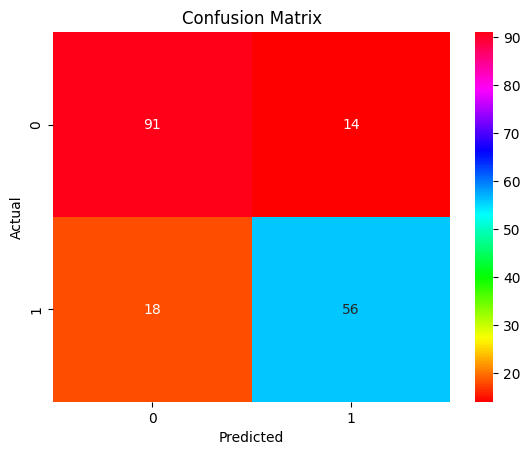

In [129]:


cf=confusion_matrix(y_test,pred1)
sns.heatmap(cf,annot=True,fmt="d",cmap="hsv")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification report

In [130]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



# roc_auc score

In [131]:
roc_auc = roc_auc_score(y_test, pred1)
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.8117117117117117


# Roc Curve

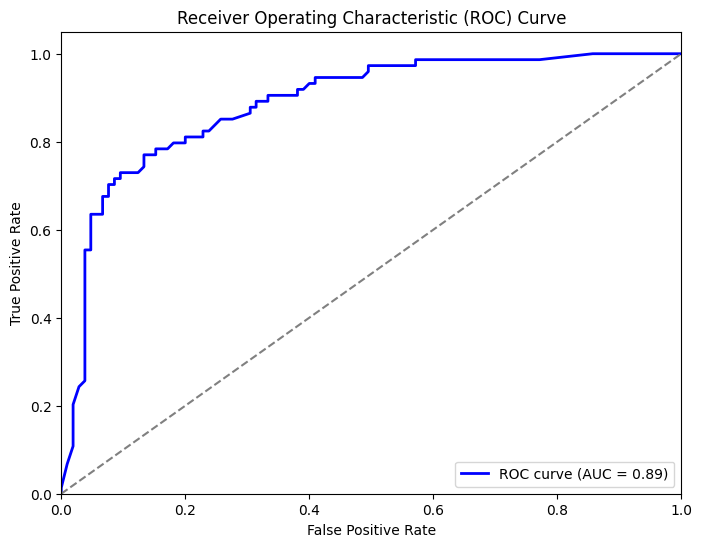

In [132]:
probs = random.predict_proba(X_test)
preds = probs[:, 1]  

fpr, tpr, thresholds = roc_curve(y_test, preds)

roc_auc = roc_auc_score(y_test, preds)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# DecisionTreeClassifier

In [133]:
from sklearn.tree import DecisionTreeClassifier
model2=DecisionTreeClassifier(random_state=42)
model2.fit(X_train,y_train)
pred2=model2.predict(X_test)
model_2_acc=accuracy_score(y_test,pred2)
model_2_acc

0.7988826815642458

# Confusion matrix

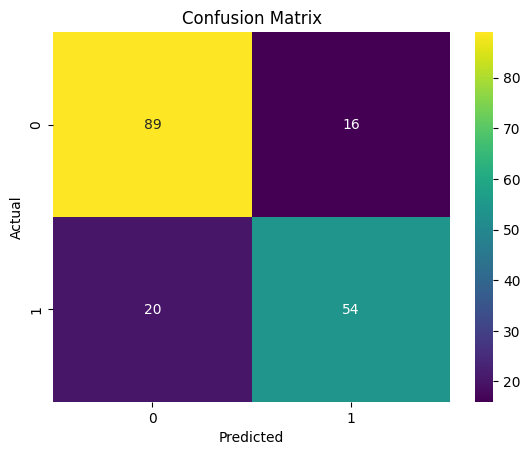

In [134]:
cf=confusion_matrix(y_test,pred2)
sns.heatmap(cf,annot=True,fmt="d",cmap="viridis")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification report

In [135]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



# roc_auc_score

In [136]:
roc_auc = roc_auc_score(y_test, pred2)
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.7886743886743887


# Roc Curve

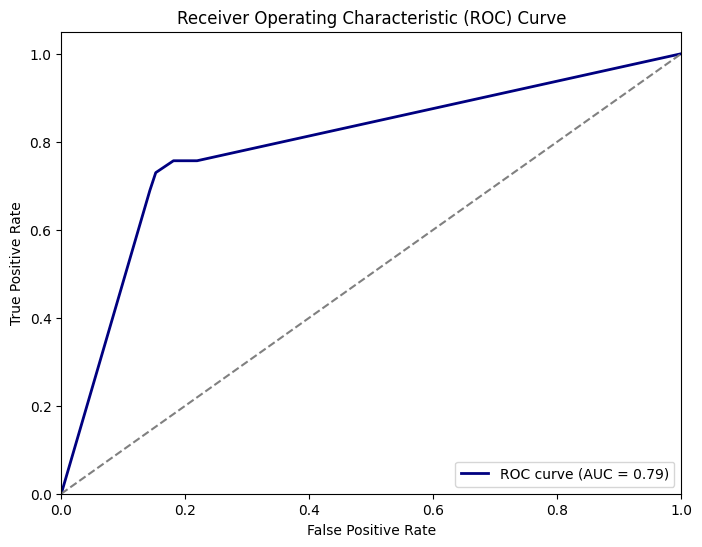

In [137]:
probs = model2.predict_proba(X_test)
preds = probs[:, 1]  

fpr, tpr, thresholds = roc_curve(y_test, preds)

roc_auc = roc_auc_score(y_test, preds)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='navy', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# GradientBoostingClassifier

In [138]:
from sklearn.ensemble import GradientBoostingClassifier
model3=GradientBoostingClassifier(random_state=42)
model3.fit(X_train,y_train)
pred3=model3.predict(X_test)
model_3_acc=accuracy_score(y_test,pred3)
model_3_acc

0.8156424581005587

# Confusion Matrix

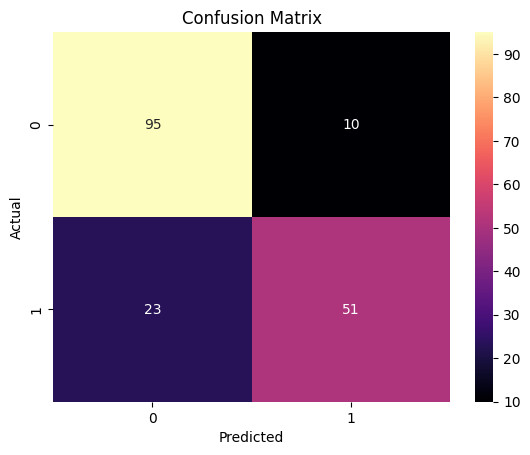

In [139]:
cf=confusion_matrix(y_test,pred3)
sns.heatmap(cf,annot=True,fmt="d",cmap="magma")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification report

In [140]:
print(classification_report(y_test,pred3))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       105
           1       0.84      0.69      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.80       179
weighted avg       0.82      0.82      0.81       179



# roc auc score

In [141]:
roc_auc = roc_auc_score(y_test, pred3)
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.796975546975547


# roc curve

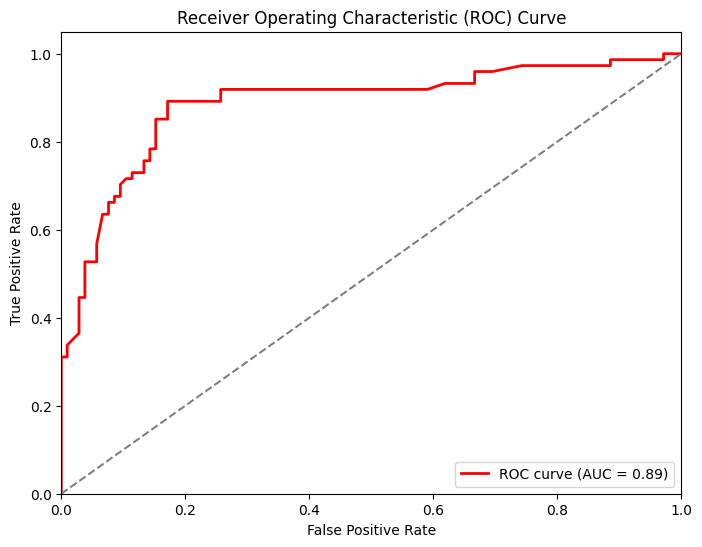

In [142]:
probs = model3.predict_proba(X_test)
preds = probs[:, 1]  

fpr, tpr, thresholds = roc_curve(y_test, preds)

roc_auc = roc_auc_score(y_test, preds)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# Catboost

In [143]:
from catboost import CatBoostClassifier
model4=CatBoostClassifier(iterations=100)
model4.fit(X_train,y_train)
pred4=model4.predict(X_test)
model_4_acc=accuracy_score(y_test,pred4)
print(model_4_acc)

Learning rate set to 0.073611
0:	learn: 0.6634641	total: 53.1ms	remaining: 5.26s
1:	learn: 0.6398819	total: 54ms	remaining: 2.65s
2:	learn: 0.6177973	total: 54.6ms	remaining: 1.77s
3:	learn: 0.5982364	total: 55.1ms	remaining: 1.32s
4:	learn: 0.5805990	total: 55.8ms	remaining: 1.06s
5:	learn: 0.5679134	total: 56.5ms	remaining: 885ms
6:	learn: 0.5537094	total: 57.2ms	remaining: 760ms
7:	learn: 0.5399111	total: 57.9ms	remaining: 666ms
8:	learn: 0.5278388	total: 58.3ms	remaining: 590ms
9:	learn: 0.5175240	total: 59ms	remaining: 531ms
10:	learn: 0.5069870	total: 59.7ms	remaining: 483ms
11:	learn: 0.4997551	total: 60.2ms	remaining: 442ms
12:	learn: 0.4908695	total: 60.8ms	remaining: 407ms
13:	learn: 0.4828669	total: 61.4ms	remaining: 377ms
14:	learn: 0.4758714	total: 62.1ms	remaining: 352ms
15:	learn: 0.4692727	total: 62.8ms	remaining: 330ms
16:	learn: 0.4630771	total: 63.5ms	remaining: 310ms
17:	learn: 0.4582748	total: 64ms	remaining: 291ms
18:	learn: 0.4532997	total: 64.7ms	remaining: 276m

# Confusion Matrix

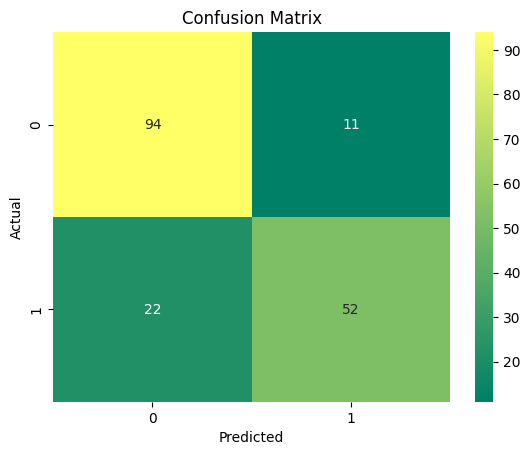

In [144]:
cf=confusion_matrix(y_test,pred4)
sns.heatmap(cf,annot=True,fmt="d",cmap="summer")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification report

In [145]:
print(classification_report(y_test,pred4))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       105
           1       0.83      0.70      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.80       179
weighted avg       0.82      0.82      0.81       179



# roc_auc_score

In [146]:
roc_auc = roc_auc_score(y_test, pred4)
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.798970398970399


# roc curve

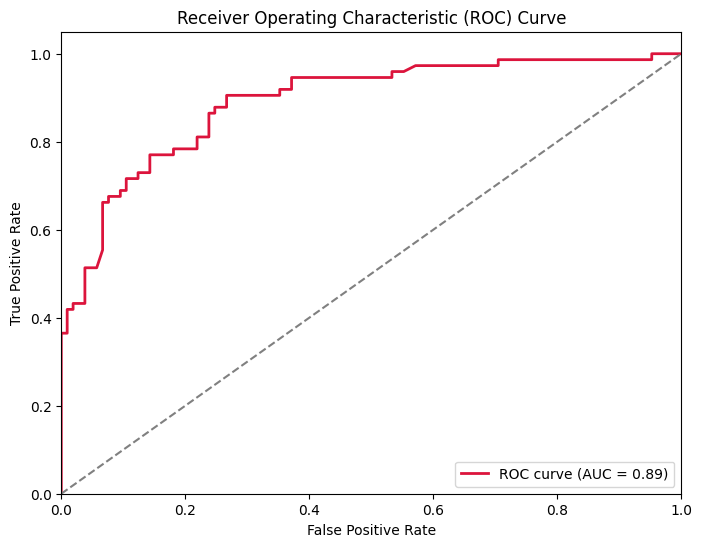

In [147]:
probs = model4.predict_proba(X_test)
preds = probs[:, 1]  

fpr, tpr, thresholds = roc_curve(y_test, preds)

roc_auc = roc_auc_score(y_test, preds)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='crimson', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


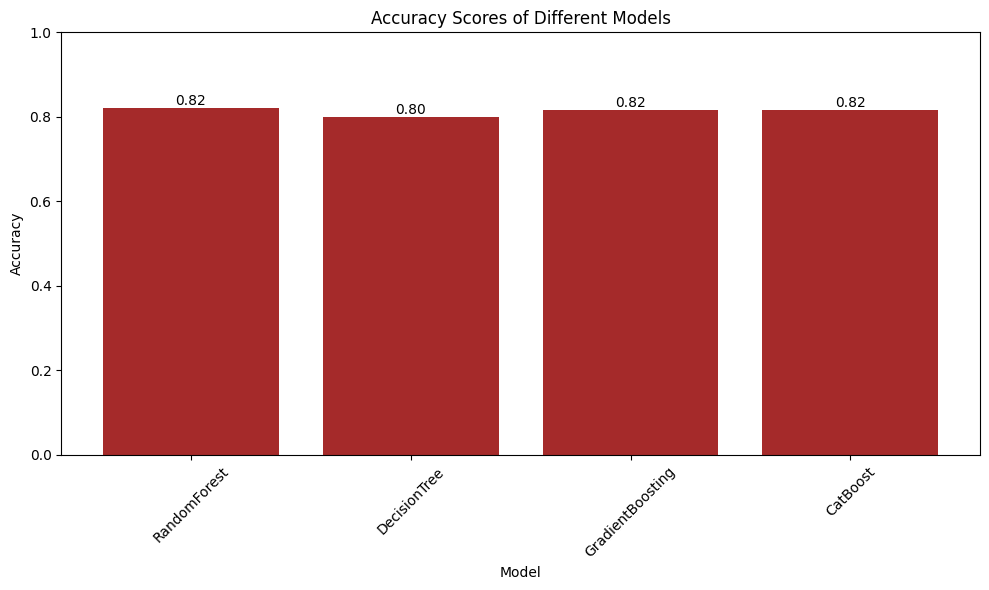

In [151]:


accuracy_scores = [model_1_acc, model_2_acc, model_3_acc, model_4_acc]
models = ['RandomForest', 'DecisionTree', 'GradientBoosting', 'CatBoost']

plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracy_scores, color='brown')

plt.title('Accuracy Scores of Different Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0.0, 1.0)
plt.xticks(rotation=45)

# Annotate each bar with its accuracy score
for bar, accuracy in zip(bars, accuracy_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{accuracy:.2f}', 
             ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [154]:
prediction=random.predict(df2)
prediction

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [155]:
final_df = pd.DataFrame({'PassengerId':test_passenger_id, 'Survived': prediction})
final_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1


In [156]:
final_df.to_csv("final_submission.csv",index=False)

# Random Forest Classifier: Accuracy Score = 0.821 

Random Forest is an ensemble learning method that constructs a multitude of decision trees during training and outputs the mode of the classes as the prediction. It's known for its robustness and good performance on a variety of datasets.

# Decision Tree Classifier: Accuracy Score = 0.799

Decision Trees are a non-parametric supervised learning method used for classification and regression tasks. They partition the feature space into a set of rectangles, with each rectangle representing a region in which the majority class is assigned.

# Gradient Boosting Classifier: Accuracy Score = 0.816

Gradient Boosting is a machine learning technique for regression and classification problems that builds models sequentially by minimizing the errors of previous models. It combines the predictions of multiple weak learners to create a strong learner.

# CatBoost Classifier: Accuracy Score = 0.816

CatBoost is an open-source gradient boosting library that provides state-of-the-art performance out-of-the-box. It handles categorical features naturally and is designed to be efficient, scalable, and easy to use.